**USAGE:**
Run the cells under "Prepare" with the play button, then test the model on prebuilt dataset or detect a picture by providing its url

# PREPARE
Run before test

### LIBRARIES

In [ ]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import urllib.request
import warnings
warnings.filterwarnings("ignore", module="tensorflow")

### DOWNLOAD MODEL AND DATA

In [ ]:
%%capture
!git clone https://huggingface.co/Firefly55lm/vera_cnn_v1
vera = tf.keras.models.load_model("/content/vera_cnn_v1")

### UTILS

**Detection**

In [ ]:
class_names = ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'Mr. Mime', 'MrMime', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorino', 'Ninetales', 'Oddish', 'Omanyte', 'Omastar', 'Parasect', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pikachu', 'Pinsir', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Primeape', 'Psyduck', 'Raichu', 'Rapidash', 'Raticate', 'Rattata', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scyther', 'Seadra', 'Seaking', 'Seel', 'Shellder', 'Slowbro', 'Slowpoke', 'Snorlax', 'Spearow', 'Squirtle', 'Starmie', 'Staryu', 'Tangela', 'Tauros', 'Tentacool', 'Tentacruel', 'Vaporeon', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Zapdos', 'Zubat']

def predict_pkmn(model, img_path):

  true_class = img_path.split("/")[-1].split(".")[0].capitalize()
  layer_indexes = [1, 7, 13, 19]
  fig, axs = plt.subplots(1, len(layer_indexes)+1, figsize=(20, 10))

  img = tf.keras.utils.load_img(img_path, target_size=(200, 200, 3), color_mode = 'rgb')
  array = tf.keras.utils.img_to_array(img)
  array = array / 255.0

  img_array = np.expand_dims(array, axis=0)
  preds = model.predict(img_array, verbose=False)

  formatted_predictions = []
  for prediction in preds:
      formatted_prediction = [f'{value:.2f}' for value in prediction]
      formatted_predictions.append(formatted_prediction)

  print("\n\nProbability for each class:", sorted(zip(class_names, formatted_predictions[0]), key=lambda x: x[1], reverse=True))

  top_prob_index = np.argmax(formatted_predictions)
  top_prob = round(float(formatted_predictions[0][top_prob_index].replace(",", "."))*100, 2)
  print(f"\nPokémon: {true_class} - Predicted: {class_names[top_prob_index]} ({top_prob}%)\n")

  axs[0].imshow(tf.keras.utils.load_img(img_path, target_size=(100,100,3), color_mode = 'rgb'))
  axs[0].axis('off')

  for i in range(0, len(layer_indexes)):
    intermediate_output = model.layers[layer_indexes[i]].output
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=intermediate_output)

    img = tf.keras.utils.load_img(img_path, target_size=(200, 200, 3), color_mode = 'rgb')
    array = tf.keras.utils.img_to_array(img)
    array = array / 255.0
    img_array = np.expand_dims(array, axis=0)

    output = intermediate_layer_model.predict(img_array, verbose=False)
    axs[i+1].imshow(output[0, :, :, 0], cmap='viridis')
    axs[i+1].axis('off')

  axs[0].set_title('Input')
  axs[1].set_title('Layer 1 output')
  axs[2].set_title('Layer 2 output')
  axs[3].set_title('Layer 3 output')
  axs[4].set_title('Layer 4 output')

  plt.show()


def detect_my_pic():
  image_url = input("Url: ")
  with urllib.request.urlopen(image_url) as response:
      with open('my_pokemon.jpg', 'wb') as out_file:
          out_file.write(response.read())
  predict_pkmn(vera, f"/content/my_pokemon.jpg")


# TEST

In [ ]:
%%capture
!git clone https://huggingface.co/datasets/Firefly55lm/pkmn

In [ ]:
for pokemon in sorted([pkmn for pkmn in os.listdir("/content/pkmn") if pkmn[0] != "."], key=lambda x: x):
  predict_pkmn(vera, f"/content/pkmn/{pokemon}")

# DETECT YOURS!
Run the cell and provide a picture url

Url: https://i.pinimg.com/736x/5d/6d/23/5d6d23fd7adb44baba20a60c252da339.jpg


Probability for each class: [('Pikachu', '1.00'), ('Abra', '0.00'), ('Aerodactyl', '0.00'), ('Alakazam', '0.00'), ('Arbok', '0.00'), ('Arcanine', '0.00'), ('Articuno', '0.00'), ('Beedrill', '0.00'), ('Bellsprout', '0.00'), ('Blastoise', '0.00'), ('Bulbasaur', '0.00'), ('Butterfree', '0.00'), ('Caterpie', '0.00'), ('Chansey', '0.00'), ('Charizard', '0.00'), ('Charmander', '0.00'), ('Charmeleon', '0.00'), ('Clefable', '0.00'), ('Clefairy', '0.00'), ('Cloyster', '0.00'), ('Cubone', '0.00'), ('Dewgong', '0.00'), ('Diglett', '0.00'), ('Ditto', '0.00'), ('Dodrio', '0.00'), ('Doduo', '0.00'), ('Dragonair', '0.00'), ('Dragonite', '0.00'), ('Dratini', '0.00'), ('Drowzee', '0.00'), ('Dugtrio', '0.00'), ('Eevee', '0.00'), ('Ekans', '0.00'), ('Electabuzz', '0.00'), ('Electrode', '0.00'), ('Exeggcute', '0.00'), ('Exeggutor', '0.00'), ('Farfetchd', '0.00'), ('Fearow', '0.00'), ('Flareon', '0.00'), ('Gastly', '0.00'), ('Ge

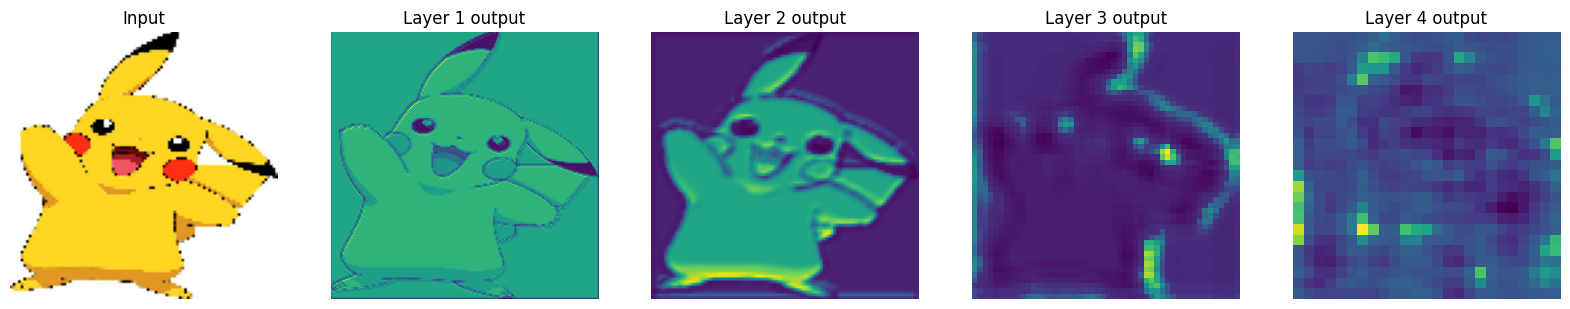

In [ ]:
detect_my_pic()